# Image classifier

In [1]:
!pip install torch
!pip install torchvision
!pip install sklearn

# Dataset
Firstly, we get the dataset and transform every picture to 1D list.

In [75]:
import torch
import torchvision
from torchvision import transforms
from sklearn.metrics import f1_score

In [2]:
transformer = transforms.Compose([
                               torchvision.transforms.ToTensor(),
    transforms.Lambda(lambda x: torch.flatten(x)),
                             ])

In [100]:
train_set=torchvision.datasets.FashionMNIST('./files/mnist/', train=True, download=True,
                             transform=transformer)

batch_size_train= (int)(len(train_set)/15)
# batch_size_test=64

26422272it [00:15, 1694464.32it/s]                                                                                     


Extracting ./files/mnist/FashionMNIST\raw\train-images-idx3-ubyte.gz to ./files/mnist/FashionMNIST\raw



29696it [00:00, 939385.42it/s]                                                                                         


Extracting ./files/mnist/FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./files/mnist/FashionMNIST\raw



4422656it [00:00, 4827237.58it/s]                                                                                      


Extracting ./files/mnist/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./files/mnist/FashionMNIST\raw



6144it [00:00, 6125458.47it/s]                                                                                         

Extracting ./files/mnist/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./files/mnist/FashionMNIST\raw



In [101]:

train_loader = torch.utils.data.DataLoader(
  train_set,
  batch_size=batch_size_train, shuffle=True)

# test_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.MNIST('/files//mnist', train=False, download=True,
#                              transform=transformer),
#   batch_size=batch_size_test, shuffle=True)

In [102]:
examples = enumerate(train_loader)
batch_idx, (train_x, train_y) = next(examples)

In [103]:
train_x.shape

torch.Size([4000, 784])

In [104]:
train_x[1].shape

torch.Size([784])

In [105]:
train_x[1]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0588, 0.0000, 0.0000, 0.0000,
        0.0039, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0039, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0078, 0.0000, 0.0000, 0.8196, 0.4471, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0039, 0.0039, 0.0000, 0.0039,
        0.0039, 0.0118, 0.0078, 0.0157, 0.0157, 0.0039, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0745, 0.8039, 0.0000, 

# Agglomerative Clustering

## Helper functions for the model and the results description

In [106]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [107]:
def fit_predict_model(train_x,affinity, linkage):
    model = AgglomerativeClustering(n_clusters=10, affinity=affinity, linkage=linkage)
    return model.fit_predict(train_x)


In [108]:
def get_count_of_class_in_cluster(predictions,train_y):
    count_of_class_in_cluster=np.zeros((10, 10))
    for element_index in range(len(predictions)):
        count_of_class_in_cluster[predictions[element_index]][train_y[element_index]] +=1
    return count_of_class_in_cluster

def get_classes_for_each_cluster(count_of_class_in_cluster):
    current_maxes, current_clusters_sizes, current_clusters_max_classes = calculate_cluster_to_class_matching(count_of_class_in_cluster,out=False)
    cluster_to_class={}
    classes = set(range(0,10))
    for cluster_id,class_id in enumerate(current_clusters_max_classes):
        cluster_to_class[cluster_id] = class_id
        if class_id in classes:
            classes.remove(class_id)
            
    return cluster_to_class 
        

In [109]:
def calculate_cluster_to_class_matching(count_of_class_in_cluster,out=True):
#     current_maxes = []
    current_clusters_sizes=count_of_class_in_cluster.sum(axis=1)
    current_clusters_max_classes=[]
    current_maxes = count_of_class_in_cluster.max(axis=1)

    for cluster_id in  range(10):
        current_max=0
        max_class_id = None
        count=0
        for class_id in range(10):
            current_elements_count=count_of_class_in_cluster[cluster_id][class_id]
            if out:
                print(f'{current_elements_count} elements from class {class_id} are from cluster {cluster_id}')
            if current_max<current_elements_count:
                current_max = current_elements_count
                max_class_id=class_id
#             count += current_elements_count
#         current_maxes.append(current_max)
#         current_clusters_sizes.append(count)
        current_clusters_max_classes.append(max_class_id)

    return current_maxes, current_clusters_sizes, current_clusters_max_classes


def calculate_class_to_cluster_matching_percents(count_of_class_in_cluster):
    current_classes_sizes=count_of_class_in_cluster.sum(axis=0)
    current_maxes = count_of_class_in_cluster.max(axis=0)
    print(current_classes_sizes)
    print(current_maxes)
    success_rates=current_maxes/current_classes_sizes
    for i in range(10):
        print(f'class {i}: most elements from a single cluster = {success_rates[i]}')
    return 1 - success_rates.sum()/10

In [110]:
import matplotlib.pyplot as plt

def pie_plot_clusters_to_classes_matching(count_of_class_in_cluster):
    for cluster_id in range(10):

        # Pie chart, where the slices will be ordered and plotted counter-clockwise:
        labels=[]
        sizes = []
        for i in range(10):
            size=count_of_class_in_cluster[cluster_id][i]
            if size!=0:
                labels.append(f'class {i}')
                sizes.append(size)

    #     explode = (0, 0.1, 0, 0,0,0,0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

        fig1, ax1 = plt.subplots()
    #     ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
    #             shadow=True, startangle=90)
        ax1.pie(sizes,labels=labels,shadow=True)
        ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        ax1.set_title(f'cluster {cluster_id}')
        plt.show()

In [111]:
def print_success_rate(clusters_max_classes,maxes,clusters_sizes):
    for i in range(10):
        print(f'cluster {i} contains mostly element form class {clusters_max_classes[i]}. Success rate = {maxes[i]/clusters_sizes[i]}')

In [112]:
def error_rate(maxes,clusters_sizes):
    return 1 - sum([maxes[i]/clusters_sizes[i] for i in range(10)])/10

In [113]:
def map_predictions(predictions,cluster_to_class):
    for i,pred in enumerate(predictions):
        predictions[i]=cluster_to_class[pred]
    return predictions    

In [122]:
def is_mapping_perfect(cluster_to_class):
    classes = set(range(0,10))
    conflicted_clusters=[]
    for cluster_id,class_id in cluster_to_class.items():
        if class_id in classes:
            classes.remove(class_id)
        else:
            conflicted_clusters.append(cluster_id)
    if not classes:
        print('Mapping is perfect')
    else:
        print('Mapping has conflicts. The left classes are ' + str(classes) + '. The conflicted clusters are '+ str(conflicted_clusters))
    return classes

## Properties experiments


affinity: “euclidean”, “l1”, “l2”, “manhattan”, “cosine”
linkage: "ward", "complete", "average", "single"

### Euclidian affinity and ward

In [115]:
predictions=fit_predict_model(train_x,affinity='euclidean', linkage='ward')
predictions.shape

(4000,)

In [116]:
predictions

array([5, 6, 7, ..., 0, 5, 7], dtype=int64)

In [117]:
count_of_class_in_cluster=get_count_of_class_in_cluster(predictions,train_y)
count_of_class_in_cluster.shape

(10, 10)

In [118]:
maxes,clusters_sizes,clusters_max_classes=calculate_cluster_to_class_matching(count_of_class_in_cluster)

0.0 elements from class 0 are from cluster 0
0.0 elements from class 1 are from cluster 0
0.0 elements from class 2 are from cluster 0
0.0 elements from class 3 are from cluster 0
0.0 elements from class 4 are from cluster 0
344.0 elements from class 5 are from cluster 0
1.0 elements from class 6 are from cluster 0
320.0 elements from class 7 are from cluster 0
42.0 elements from class 8 are from cluster 0
47.0 elements from class 9 are from cluster 0
219.0 elements from class 0 are from cluster 1
13.0 elements from class 1 are from cluster 1
1.0 elements from class 2 are from cluster 1
184.0 elements from class 3 are from cluster 1
18.0 elements from class 4 are from cluster 1
0.0 elements from class 5 are from cluster 1
43.0 elements from class 6 are from cluster 1
0.0 elements from class 7 are from cluster 1
1.0 elements from class 8 are from cluster 1
0.0 elements from class 9 are from cluster 1
17.0 elements from class 0 are from cluster 2
7.0 elements from class 1 are from cluste

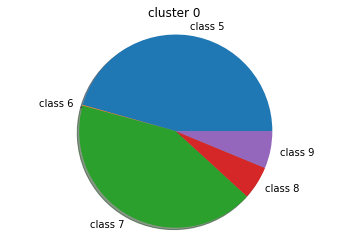

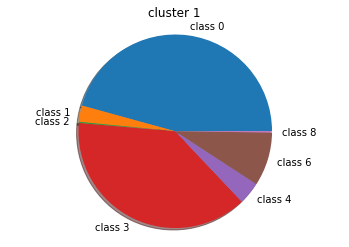

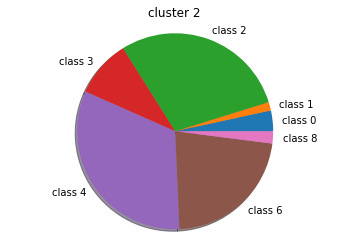

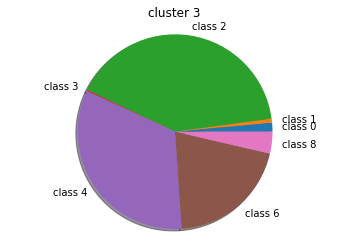

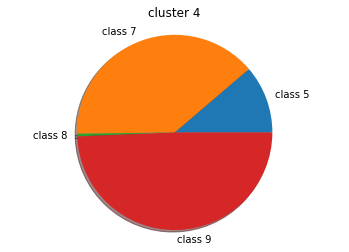

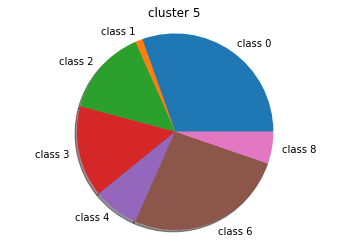

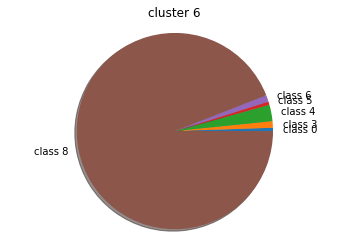

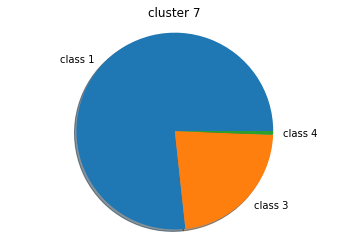

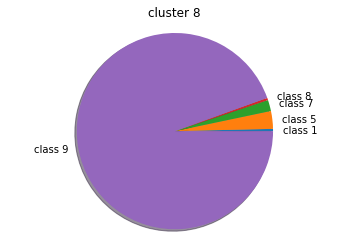

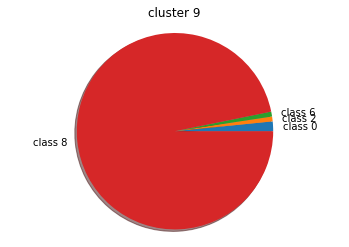

In [119]:
pie_plot_clusters_to_classes_matching(count_of_class_in_cluster)

In [120]:
cluster_to_class = get_classes_for_each_cluster(count_of_class_in_cluster)
cluster_to_class

{0: 5, 1: 0, 2: 4, 3: 2, 4: 9, 5: 0, 6: 8, 7: 1, 8: 9, 9: 8}

In [123]:
is_mapping_perfect(cluster_to_class)

Mapping has conflicts. The left classes are {3, 6, 7}. The conflicted clusters are [5, 8, 9]


{3, 6, 7}

We see that class 8 is the most frequent class for cluster 6 and 9, class 9 is for cluster 4 and 8, class 0 is for cluster 1 and 5.

In [133]:
count_of_class_in_cluster[1]

array([219.,  13.,   1., 184.,  18.,   0.,  43.,   0.,   1.,   0.])

In [134]:
count_of_class_in_cluster[5]

array([150.,   6.,  70.,  74.,  37.,   0., 130.,   0.,  26.,   0.])

In [135]:
cluster_to_class[5] = 6

In [136]:
count_of_class_in_cluster[4]

array([  0.,   0.,   0.,   0.,   0.,  26.,   0.,  90.,   1., 114.])

In [137]:
count_of_class_in_cluster[8]

array([  0.,   1.,   0.,   0.,   0.,   8.,   0.,   5.,   1., 258.])

In [138]:
cluster_to_class[4] = 7

In [139]:
count_of_class_in_cluster[6]

array([  1.,   0.,   0.,   2.,   5.,   1.,   2.,   0., 174.,   0.])

In [140]:
count_of_class_in_cluster[9]

array([  2.,   0.,   1.,   0.,   0.,   0.,   1.,   0., 121.,   0.])

In [141]:
cluster_to_class[9] = 3

In [142]:
is_mapping_perfect(cluster_to_class)

Mapping is perfect


set()

In [144]:
predictions = map_predictions(predictions,cluster_to_class)
f1_score(train_y, predictions, average='weighted')

0.04072178590126232

### Euclidian affinity and complete

In [145]:
predictions=fit_predict_model(train_x,affinity='euclidean', linkage='complete')
predictions.shape

(4000,)

In [146]:
predictions

array([0, 1, 0, ..., 3, 0, 0], dtype=int64)

In [147]:
count_of_class_in_cluster=get_count_of_class_in_cluster(predictions,train_y)
count_of_class_in_cluster.shape

(10, 10)

In [148]:
maxes,clusters_sizes,clusters_max_classes=calculate_cluster_to_class_matching(count_of_class_in_cluster)

175.0 elements from class 0 are from cluster 0
399.0 elements from class 1 are from cluster 0
56.0 elements from class 2 are from cluster 0
305.0 elements from class 3 are from cluster 0
41.0 elements from class 4 are from cluster 0
2.0 elements from class 5 are from cluster 0
113.0 elements from class 6 are from cluster 0
0.0 elements from class 7 are from cluster 0
24.0 elements from class 8 are from cluster 0
7.0 elements from class 9 are from cluster 0
6.0 elements from class 0 are from cluster 1
0.0 elements from class 1 are from cluster 1
68.0 elements from class 2 are from cluster 1
3.0 elements from class 3 are from cluster 1
52.0 elements from class 4 are from cluster 1
1.0 elements from class 5 are from cluster 1
64.0 elements from class 6 are from cluster 1
0.0 elements from class 7 are from cluster 1
135.0 elements from class 8 are from cluster 1
0.0 elements from class 9 are from cluster 1
11.0 elements from class 0 are from cluster 2
1.0 elements from class 1 are from clu

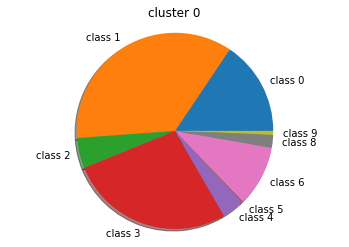

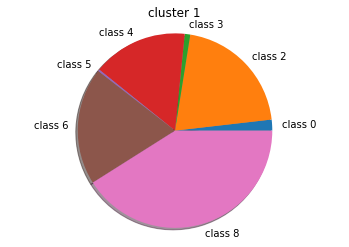

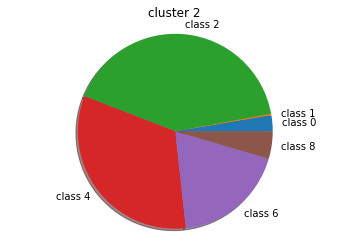

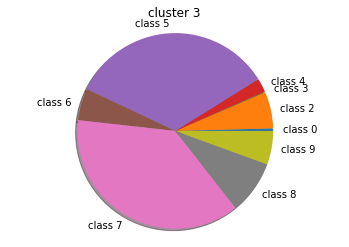

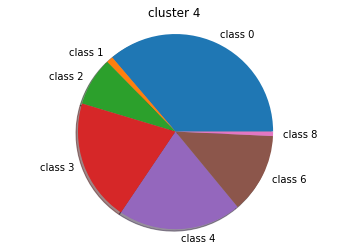

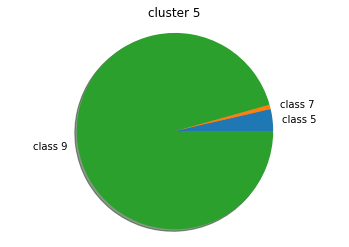

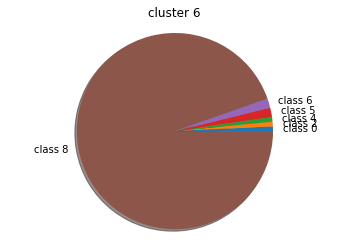

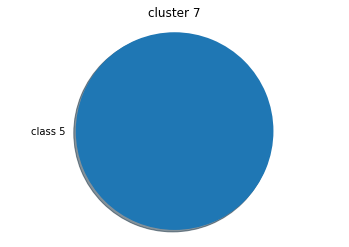

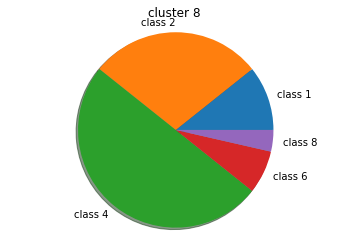

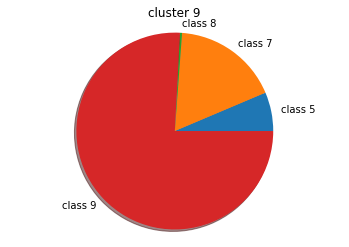

In [149]:
pie_plot_clusters_to_classes_matching(count_of_class_in_cluster)

In [162]:
cluster_to_class = get_classes_for_each_cluster(count_of_class_in_cluster)
cluster_to_class

{0: 1, 1: 8, 2: 2, 3: 7, 4: 0, 5: 9, 6: 8, 7: 5, 8: 4, 9: 9}

cluster 1 and 6 are from class 8 and cluster 5 and 9 are from class 9.

In [163]:
is_mapping_perfect(cluster_to_class)

Mapping has conflicts. The left classes are {3, 6}. The conflicted clusters are [6, 9]


{3, 6}

In [164]:
count_of_class_in_cluster[1]

array([  6.,   0.,  68.,   3.,  52.,   1.,  64.,   0., 135.,   0.])

In [165]:
count_of_class_in_cluster[6]

array([  1.,   0.,   1.,   0.,   1.,   2.,   2.,   0., 123.,   0.])

In [166]:
cluster_to_class[6] = 3

In [167]:
count_of_class_in_cluster[5]

array([  0.,   0.,   0.,   0.,   0.,   5.,   0.,   1.,   0., 132.])

In [168]:
count_of_class_in_cluster[9]

array([  0.,   0.,   0.,   0.,   0.,  19.,   0.,  52.,   1., 226.])

In [169]:
cluster_to_class[5] = 6

In [170]:
is_mapping_perfect(cluster_to_class)

Mapping is perfect


set()

In [171]:
predictions = map_predictions(predictions,cluster_to_class)
f1_score(train_y, predictions, average='weighted')

0.3100966437299321

### Euclidian affinity and average as linkage

In [172]:
predictions=fit_predict_model(train_x,affinity='euclidean', linkage='average')
predictions.shape

(4000,)

In [173]:
predictions

array([4, 2, 0, ..., 4, 4, 0], dtype=int64)

In [174]:
count_of_class_in_cluster=get_count_of_class_in_cluster(predictions,train_y)
count_of_class_in_cluster.shape

(10, 10)

In [175]:
maxes,clusters_sizes,clusters_max_classes=calculate_cluster_to_class_matching(count_of_class_in_cluster)

288.0 elements from class 0 are from cluster 0
406.0 elements from class 1 are from cluster 0
356.0 elements from class 2 are from cluster 0
357.0 elements from class 3 are from cluster 0
341.0 elements from class 4 are from cluster 0
0.0 elements from class 5 are from cluster 0
293.0 elements from class 6 are from cluster 0
0.0 elements from class 7 are from cluster 0
32.0 elements from class 8 are from cluster 0
3.0 elements from class 9 are from cluster 0
1.0 elements from class 0 are from cluster 1
0.0 elements from class 1 are from cluster 1
0.0 elements from class 2 are from cluster 1
2.0 elements from class 3 are from cluster 1
5.0 elements from class 4 are from cluster 1
1.0 elements from class 5 are from cluster 1
2.0 elements from class 6 are from cluster 1
0.0 elements from class 7 are from cluster 1
152.0 elements from class 8 are from cluster 1
0.0 elements from class 9 are from cluster 1
3.0 elements from class 0 are from cluster 2
0.0 elements from class 1 are from clust

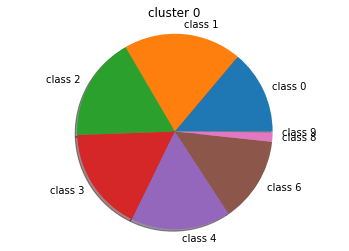

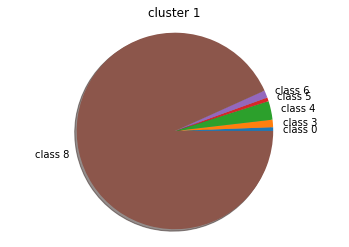

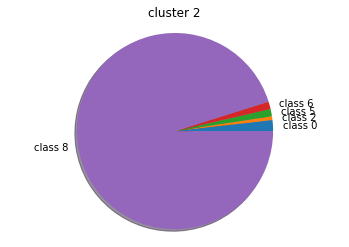

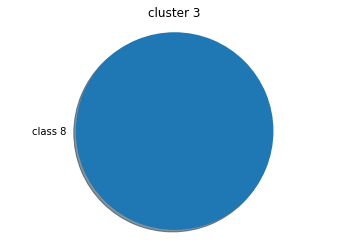

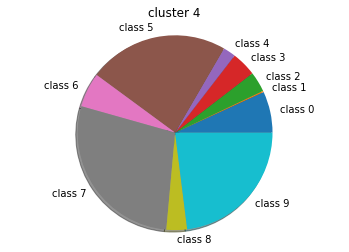

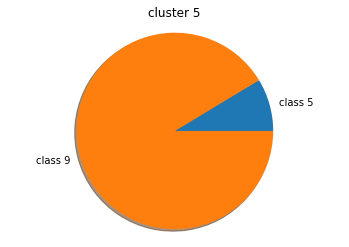

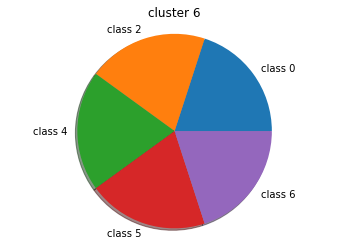

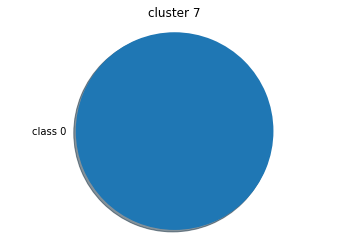

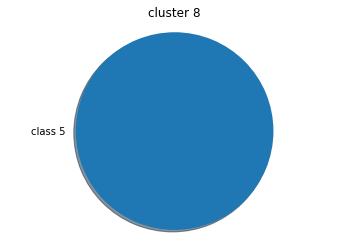

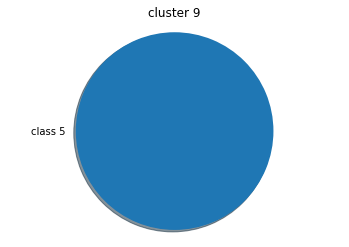

In [176]:
pie_plot_clusters_to_classes_matching(count_of_class_in_cluster)

In [177]:
cluster_to_class = get_classes_for_each_cluster(count_of_class_in_cluster)
cluster_to_class

{0: 1, 1: 8, 2: 8, 3: 8, 4: 7, 5: 9, 6: 0, 7: 0, 8: 5, 9: 5}

In [178]:
is_mapping_perfect(cluster_to_class)

Mapping has conflicts. The left classes are {2, 3, 4, 6}. The conflicted clusters are [2, 3, 7, 9]


{2, 3, 4, 6}

In [179]:
count_of_class_in_cluster[1]

array([  1.,   0.,   0.,   2.,   5.,   1.,   2.,   0., 152.,   0.])

In [180]:
count_of_class_in_cluster[2]

array([  3.,   0.,   1.,   0.,   0.,   2.,   2.,   0., 157.,   0.])

In [181]:
count_of_class_in_cluster[3]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [184]:
count_of_class_in_cluster[6]

array([1., 0., 1., 0., 1., 1., 1., 0., 0., 0.])

In [185]:
count_of_class_in_cluster[7]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [182]:
count_of_class_in_cluster[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [183]:
count_of_class_in_cluster[9]

array([ 0.,  0.,  0.,  0.,  0., 21.,  0.,  0.,  0.,  0.])

In [186]:
cluster_to_class[1] = 4
cluster_to_class[3] = 3
cluster_to_class[6] = 2
cluster_to_class[8] = 6

In [187]:
is_mapping_perfect(cluster_to_class)

Mapping is perfect


set()

In [188]:
predictions = map_predictions(predictions,cluster_to_class)
f1_score(train_y, predictions, average='weighted')

0.17769163164016963

### Euclidian affinity and single as linkage

In [189]:
predictions=fit_predict_model(train_x,affinity='euclidean', linkage='single')
predictions.shape

(4000,)

In [190]:
count_of_class_in_cluster=get_count_of_class_in_cluster(predictions,train_y)
count_of_class_in_cluster.shape

(10, 10)

In [191]:
maxes,clusters_sizes,clusters_max_classes=calculate_cluster_to_class_matching(count_of_class_in_cluster)

396.0 elements from class 0 are from cluster 0
409.0 elements from class 1 are from cluster 0
406.0 elements from class 2 are from cluster 0
420.0 elements from class 3 are from cluster 0
378.0 elements from class 4 are from cluster 0
374.0 elements from class 5 are from cluster 0
383.0 elements from class 6 are from cluster 0
415.0 elements from class 7 are from cluster 0
391.0 elements from class 8 are from cluster 0
419.0 elements from class 9 are from cluster 0
0.0 elements from class 0 are from cluster 1
0.0 elements from class 1 are from cluster 1
0.0 elements from class 2 are from cluster 1
0.0 elements from class 3 are from cluster 1
0.0 elements from class 4 are from cluster 1
1.0 elements from class 5 are from cluster 1
0.0 elements from class 6 are from cluster 1
0.0 elements from class 7 are from cluster 1
0.0 elements from class 8 are from cluster 1
0.0 elements from class 9 are from cluster 1
0.0 elements from class 0 are from cluster 2
0.0 elements from class 1 are from 

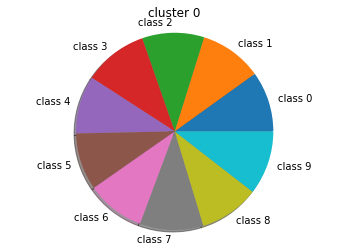

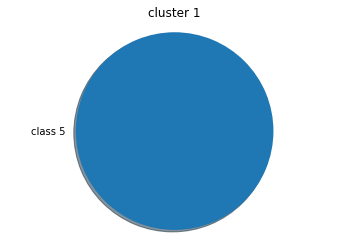

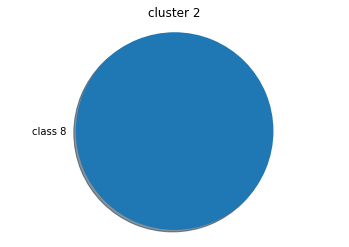

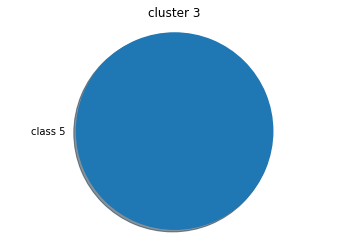

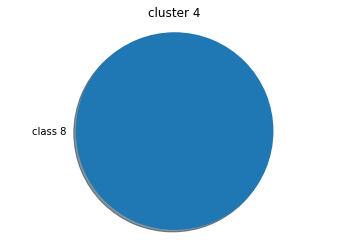

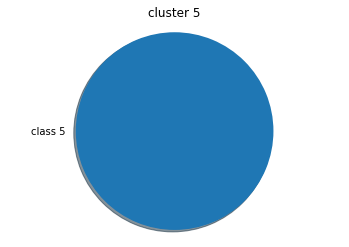

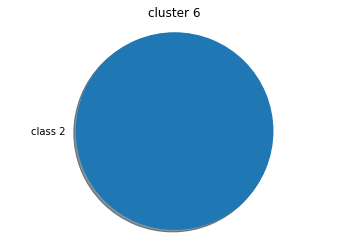

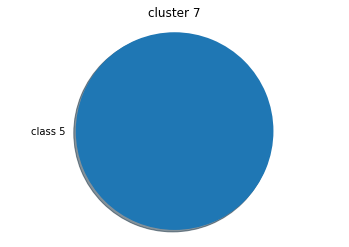

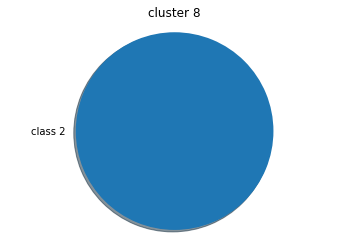

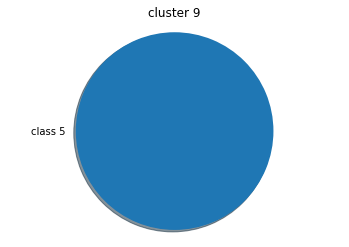

In [192]:
pie_plot_clusters_to_classes_matching(count_of_class_in_cluster)

In [195]:
is_mapping_perfect(cluster_to_class)

Mapping is perfect


set()

In [196]:
predictions = map_predictions(predictions,cluster_to_class)
f1_score(train_y, predictions, average='weighted')

0.020505397226560335